<a href="https://colab.research.google.com/github/kisung2577/CMPE-255/blob/main/Data_Portability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.0 MB/s 


In [ ]:
titanic=pd.read_csv('/content/train.csv')
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# all the numerical features are continuous in nature here
num_features=titanic.describe().columns.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 titanic[num_features], titanic["Transported"], test_size=0.3,
 random_state=0)

In [ ]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7289,64.0,19.0,261.0,208.0,0.0,214.0
2709,24.0,NaN,2.0,25.0,NaN,707.0
6803,44.0,0.0,0.0,16.0,72.0,4304.0
3731,34.0,0.0,847.0,14.0,0.0,0.0
6333,13.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#filling null values using median of train set

X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_train.median(),inplace=True)

In [ ]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,16.0,0.0,0.0,623.0,40.0,209.0
6057,2.0,0.0,0.0,0.0,0.0,0.0
2797,31.0,517.0,1.0,301.0,60.0,4.0
7110,14.0,653.0,0.0,4.0,0.0,0.0
8579,30.0,0.0,0.0,0.0,0.0,0.0


# 1. Equal width Binning

## Normal way

### intervals

In [ ]:
# Lets Divide Age into 10 Bins
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()
# Applying the formula shown above
maximum=X_train_copy['Age'].max()
minimum=X_test_copy['Age'].min()
roomRange= maximum - minimum 
width = int(roomRange/10)
width

#inerval width is shown in output

7

In [ ]:
# lets create new min and max values for our interval with rounded min and max values of RoomService
min_value = int(np.floor(minimum))
max_value = int(np.ceil( maximum))
print(" min-->",min_value,"\n","max-->",max_value,"\n","inerval_width-->",width)

 min--> 0 
 max--> 79 
 inerval_width--> 7


In [ ]:
intervals = [i for i in range(min_value, max_value + width,width)]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

In [ ]:
#To divide a pandas Series into intervals, we will use pandas' cut() method,
X_train_copy['Age_Bins'] = pd.cut(x=X_train_copy['Age'], bins=intervals,
include_lowest=True)
X_test_copy['Age_Bins'] = pd.cut(x=X_test_copy['Age'], bins=intervals,
include_lowest=True)

In [ ]:
X_train_copy.head()
#In equal-width discretization, there is usually a different number of observations per interval.

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bins
7289,64.0,19.0,261.0,208.0,0.0,214.0,"(63.0, 70.0]"
2709,24.0,0.0,2.0,25.0,0.0,707.0,"(21.0, 28.0]"
6803,44.0,0.0,0.0,16.0,72.0,4304.0,"(42.0, 49.0]"
3731,34.0,0.0,847.0,14.0,0.0,0.0,"(28.0, 35.0]"
6333,13.0,0.0,0.0,0.0,0.0,0.0,"(7.0, 14.0]"


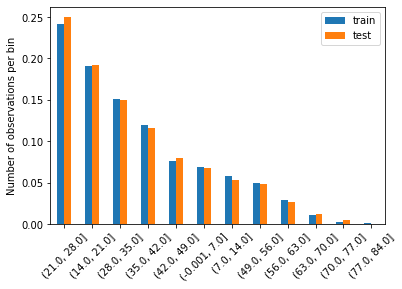

In [ ]:
t1 = X_train_copy['Age_Bins'].value_counts() / len(X_train)
t2 = X_test_copy['Age_Bins'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin');

## Better Way

In [ ]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [ ]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [ ]:
widthDiscretiser=EqualWidthDiscretiser(bins=10,variables=["Age"])
#to know more about paramaters of this class 

In [ ]:
widthDiscretiser.fit(X_train_copy)
widthDiscretiser.binner_dict_

{'Age': [-inf,
  7.9,
  15.8,
  23.700000000000003,
  31.6,
  39.5,
  47.400000000000006,
  55.300000000000004,
  63.2,
  71.10000000000001,
  inf]}

In [ ]:
X_train_copy=widthDiscretiser.transform(X_train_copy)
X_test_copy=widthDiscretiser.transform(X_test_copy)
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,2,0.0,0.0,623.0,40.0,209.0
6057,0,0.0,0.0,0.0,0.0,0.0
2797,3,517.0,1.0,301.0,60.0,4.0
7110,1,653.0,0.0,4.0,0.0,0.0
8579,3,0.0,0.0,0.0,0.0,0.0


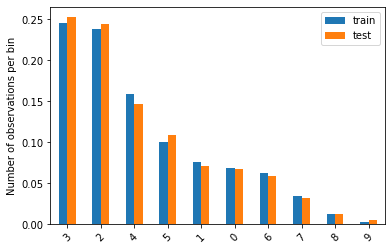

In [ ]:
t1 = X_train_copy['Age'].value_counts() / len(X_train_copy)
t2 = X_test_copy['Age'].value_counts() / len(X_test_copy)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin');

## Distribution

In [ ]:
def make_plot(X,X_copy,variable):
    plt.figure(figsize=(12,6))
    sns.countplot(x=X[variable])
    plt.title("Before Binning ")
    plt.show()
    plt.figure(figsize=(12,6))
    sns.countplot(x=X_copy[variable])
    plt.title("After Binning ")
    plt.show()

### train

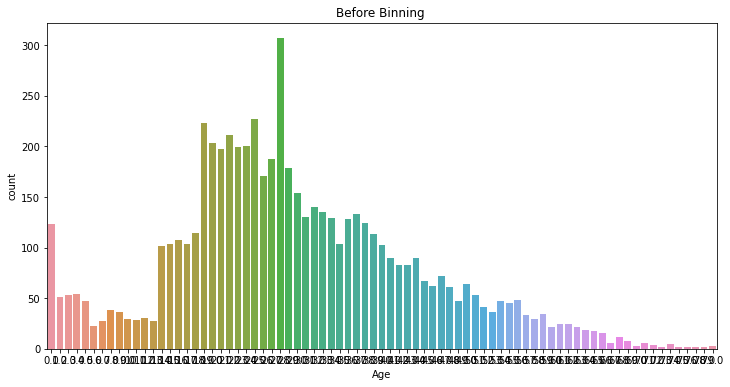

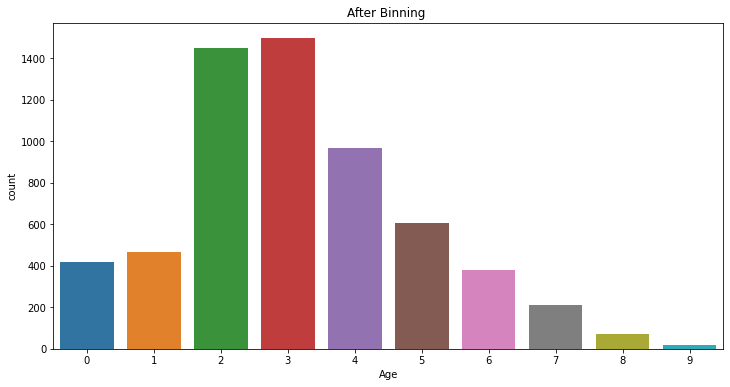

In [ ]:
make_plot(X_train,X_train_copy,"Age")

### test

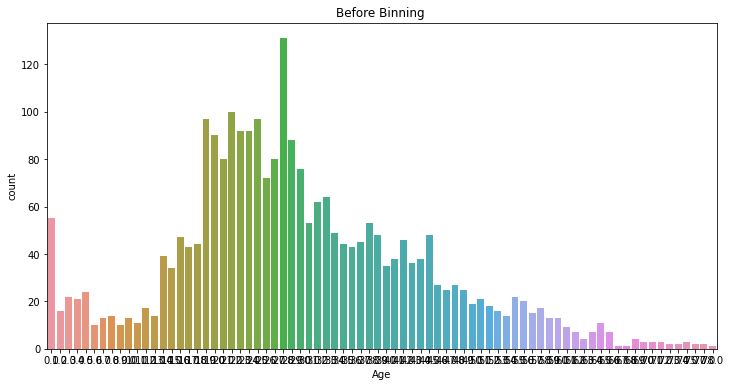

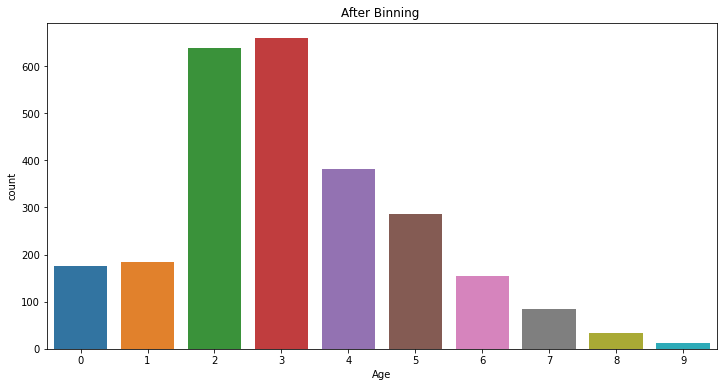

In [ ]:
make_plot(X_test,X_test_copy,"Age")

In [ ]:
# checking for outliers
def box_plot(X,X_copy,variable):
    plt.subplot(1,2,1)
    X[variable].plot.box(title="Before discretization")
    plt.subplot(1,2,2)
    X_copy[variable].plot.box(title="After discretization");

## outliers

### train

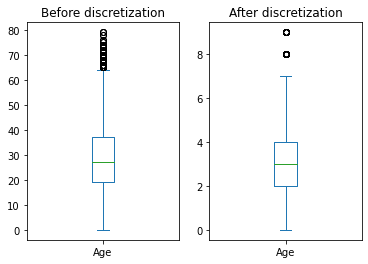

In [ ]:
box_plot(X_train,X_train_copy,"Age")

### test

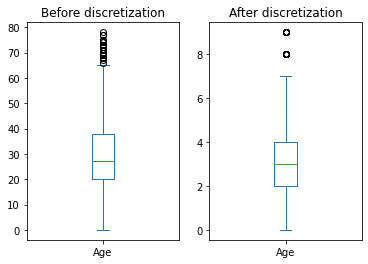

In [ ]:
box_plot(X_test,X_test_copy,"Age")

# Equal Frequency Binning

## Normal Way

In [ ]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [ ]:
X_train_copy['Age_Bins'], intervals = pd.qcut(X_train['Age'], 10,
labels=None, retbins=True)

X_test_copy['Age_Bins'] = pd.cut(x = X_test_copy['Age'], bins=intervals)

In [ ]:
## see how the df b/w two intervals is not same 

In [ ]:
print(intervals)

[ 0. 13. 18. 21. 24. 27. 30. 35. 40. 49. 79.]


In [ ]:
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Bins
3601,16.0,0.0,0.0,623.0,40.0,209.0,"(13.0, 18.0]"
6057,2.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 13.0]"
2797,31.0,517.0,1.0,301.0,60.0,4.0,"(30.0, 35.0]"
7110,14.0,653.0,0.0,4.0,0.0,0.0,"(13.0, 18.0]"
8579,30.0,0.0,0.0,0.0,0.0,0.0,"(27.0, 30.0]"


## Better way

In [ ]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

from feature_engine.discretisation import  EqualFrequencyDiscretiser

In [ ]:
frqDisc = EqualFrequencyDiscretiser(q=10,variables=["Age"])

In [ ]:
frqDisc.fit(X_train_copy)
frqDisc.binner_dict_

{'Age': [-inf, 13.0, 18.0, 21.0, 24.0, 27.0, 30.0, 35.0, 40.0, 49.0, inf]}

In [ ]:
X_train_copy=frqDisc.transform(X_train_copy)
X_test_copy=frqDisc.transform(X_test_copy)

In [ ]:
# Numbers represent the qantiles here in Age column
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,1,0.0,0.0,623.0,40.0,209.0
6057,0,0.0,0.0,0.0,0.0,0.0
2797,6,517.0,1.0,301.0,60.0,4.0
7110,1,653.0,0.0,4.0,0.0,0.0
8579,5,0.0,0.0,0.0,0.0,0.0


## Distribution

### train

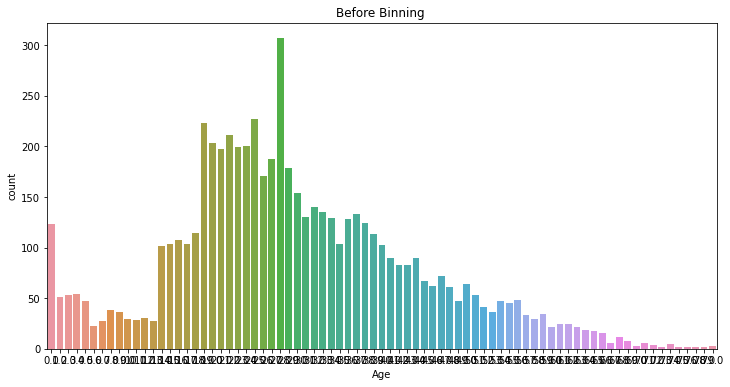

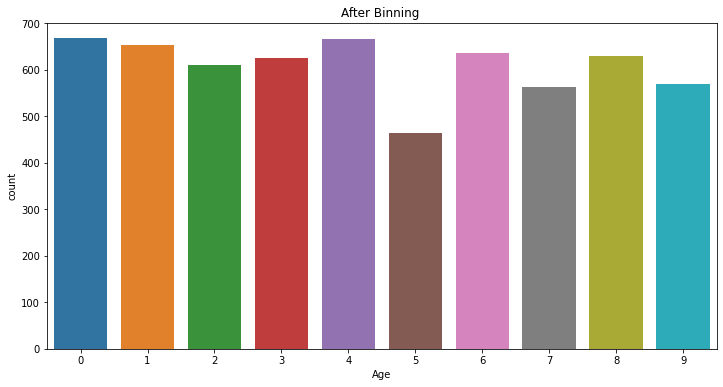

In [ ]:
make_plot(X_train,X_train_copy,"Age")

### test

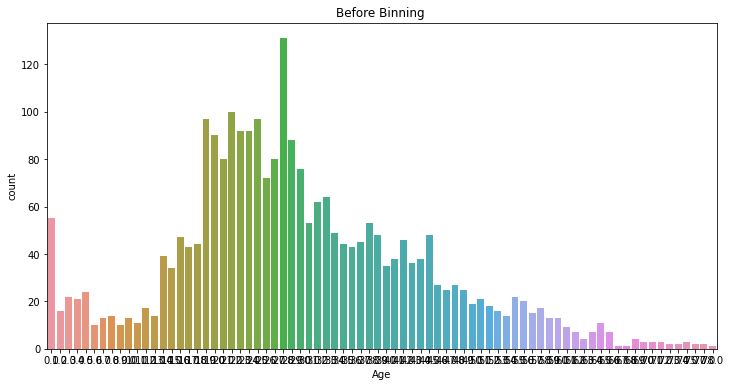

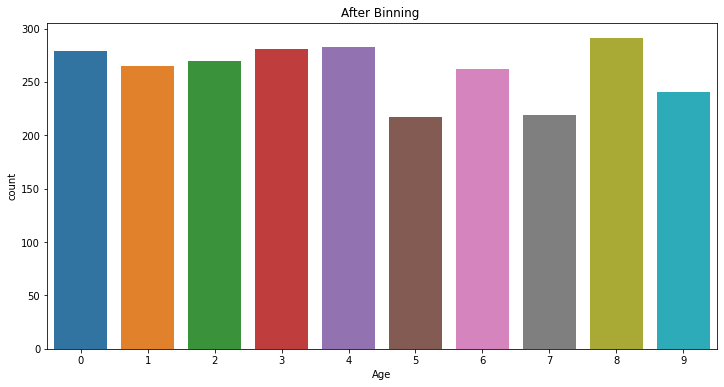

In [ ]:
make_plot(X_test,X_test_copy,"Age")

## outliers

### train

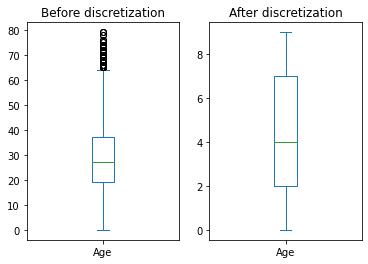

In [ ]:
box_plot(X_train,X_train_copy,"Age")

### test

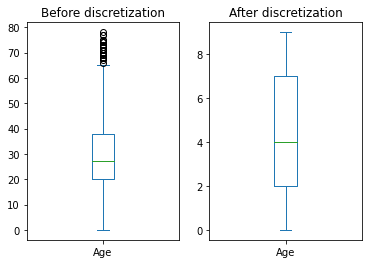

In [ ]:
box_plot(X_test,X_test_copy,"Age")